<a href="https://colab.research.google.com/github/dayomoro/Omega_loan_prediction_app/blob/main/loan_prediction_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

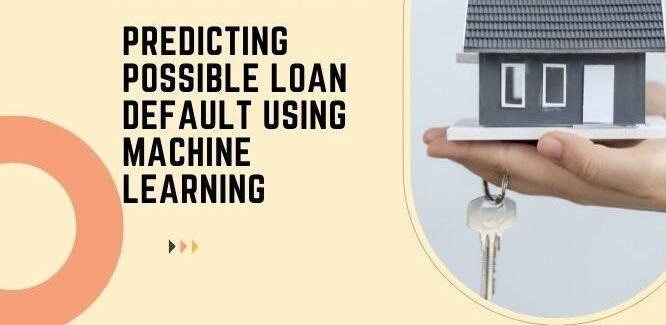

 # **GROUP 5/TEAM 1 PROJECT BRIEF AND BREAKDOWN**

 # ***Data Science Team***
 # 1. Elijah Vande
 # 2. Ehinmoro Dayo
 # 3. Chiamaka Eboagu





## **LOAN DEFAULT PREDICTION PROJECT**
The objective of this initiative is to create a system that automates the assessment of loan eligibility in real-time, leveraging the information provided by customers when they complete the online application form. This UX business case assignment will delve into the rationale behind developing a Loan Default software solution..

### **Context**

The bank's central goal is to enhance its loan default risk mitigation strategy by leveraging historical data and an intelligent automated system to precisely forecast the probability of borrowers defaulting on their loans.

The primary business aim of this project is to elevate the bank's overall profitability by minimizing the occurrence of loan defaults. The accurate prediction of loan default likelihood empowers the bank to enhance lending decisions, diminish default rates, selectively approve loans for eligible applicants, thereby leading to increased profitability.

The secondary business objective is to elevate the user experience for loan officers and risk analysts. Achieving this by implementing a user-friendly interface that enables these professionals to swiftly and effortlessly evaluate loan default risks. This enhancement in operational efficiency reduces the likelihood of errors, providing a dual benefit for the bank.

### **Features**

User-Friendly Interface: The interface needs to be user-friendly, intuitive, and easy to navigate for loan officers and risk analysts who may not possess advanced data expertise. It should have a straightforward design with clear prompts for action and use easily comprehensible language.

Dashboard: The dashboard must offer a comprehensive overview of loan application data, risk assessments, and vital metrics, enabling users to make well-informed decisions efficiently.

Data Visualization: The interface should present data in a visually appealing and easily understandable manner, leveraging charts, graphs, or similar formats, to enhance users' ability to grasp and interpret information.

Interactive Elements: Incorporating interactive elements such as dropdown menus, checkboxes, and sliders can facilitate users in entering data and adjusting the loan risk assessment model with ease.

Predictive Models: The predictive models should be transparent, allowing users to understand how the models reached specific predictions or decisions. This transparency aids users in comprehending the model's output and rationale.

Error Messaging: The interface should promptly deliver clear and concise error messages to guide users in rectifying input mistakes.

Notifications: The system should generate notifications or alerts when new loan applications are submitted or when an application warrants additional review due to a potential default risk.

Help and Support: The interface should provide effortless access to help and support resources, including user manuals, tutorials, and a dedicated support team, to address any user questions or concerns.

Accessibility: The interface should be accessible to all users, including those with disabilities, through the incorporation of assistive technologies like screen readers, voice recognition software, and keyboard navigation.

Security: The interface must incorporate robust security features to safeguard sensitive data and prevent unauthorized access. This includes measures like password protection, data encryption, and user authentication.

### **Here are the deliverables**;
1. Questionnaires & Results
2. Empathy Maps
3. Personas
4. Competitive Analysis
5. User Stories & Flows
6. Information Architecture
7. Ideation Summary
8. Sketches
9. Wireframes
10. Hi-Fidelity Prototype
11. Usability Testing Results




## **BEGINNING OF THE PROJECT**
We started the project by sourcing for data for the project.
The project required us to get data through;
1. web scrapping
2. Open source data
3. Mock data
We could not web-scrap the data bwcause of its confiential nature and data privacy policies.
We then got a data set from Kaggle, an open-source data sets and data scientists platforM, but could not use it because it was not fit for our use-case.The data we downloaded can be found [here](https://www.kaggle.com/datasets/yasserh/loan-default-dataset).  
Finally we created a mock data using a python library called faker. The faker code that created the data can be found [here](https://github.com/Vande7/Loan_prediction_project_Data_science/blob/Chiamaka/Intertrack_Load%20_app.ipynb)

## Importing libraries and packages


In [ ]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence
from datetime import datetime

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)


# Libraries
import pandas as pd  # Dataframes
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Visualization
from sklearn.preprocessing import OneHotEncoder  # Encoding with categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer  # Filling in null values for numeric data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_selection import SelectKBest, chi2


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

%load_ext lab_black

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Reading the data into a dataframe

In [ ]:
# Reading the data into a dataframe
data = pd.read_csv(
    "C:/Users/user/Desktop/Stutern_inter_track_project/final_loan_data_4.csv"
)

## Viewing the data set

In [ ]:
# Viewing the data
data.head(3)

,customer_id,name,gender,marital_status,phone_number,email_address,date_of_birth,address,national_identity_number,employment,income_per_month,loan_type,applicants_job_role_sector,repayment_type,collateral_type,collateral_value,guarantor_name,guarantor_phone_number,guarantor_email,guarantor_dob,guarantor_address,guarantor_social_security_number,guarantor_relationship,guarantor_employment,guarantor_other_sources_of_income,guarantor_income_per_month,loan_amount,loan_default
0,LA-586298,Iyke Johnson,Male,divorced,070-8307-3753,torresjames@example.net,1984-08-06,"5677 Ahmadu Bello Way Str., Abuja Central, Abuja Central LGA, Abuja State",48795524366,FullTime,251236,Business Loan,Lawyer (Legal),Principal & Interest,Business Equipment,1514544,Onyeka Esangbedo,090-6122-7796,carriemurray@example.com,1965-09-07,"2564 Adetokunbo Ademola Crescent Str., Abuja Central, Abuja Central LGA, Abuja State",108-11-1083,Parent,Contract,Freelancing,578807,957624,Yes
1,LA-429449,Umaru Osinaike,Male,married,090-7211-7737,davidjohnson@example.net,1966-04-06,"281 Capitol Road Str., Agege, Agege LGA, Lagos State",59336208791,FullTime,286225,Agricultural Loan,Cybersecurity Analyst (Information Technology),Principal & Interest,Business Equipment,9559666,Micheal Akinwunmi,081-5892-1777,xpetersen@example.com,1989-05-16,"6326 Ojowo Road Str., Ijebu-Ode, Ijebu-Ode LGA, Ogun State",572-80-5627,Parent,PartTime,Rental Income,264036,555027,Yes
2,LA-647045,Edet Ume,Male,married,081-5020-4429,stevensonsarah@example.net,1999-11-21,"6884 Udo Udoma Avenue Str., Uyo, Uyo LGA, Akwa Ibom State",30562895958,Contract,113014,Agricultural Loan,Software Developer (Information Technology),Principal & Interest,Business Equipment,8091217,Ini Adekunle,080-6859-8646,hollywalters@example.com,1972-03-22,"9745 Toyin Street Str., Ikeja, Epe LGA, Lagos State",841-04-2065,Employer,PartTime,Agriculture and Farming,559450,922105,No


In [ ]:
# Checking the shape of the data, that is the number of rows and columns in the data.
data.shape

(50000, 28)

## Data onboaring and validation

In [ ]:
# Checking for the shape that is, the number of rows & columns in the data set


# Get the number of rows and columns
num_rows = data.shape[0]
num_columns = data.shape[1]

# Print the number of rows and columns
shape = f"The data has {num_rows} rows and {num_columns} columns."
print(shape)

The data has 50000 rows and 28 columns.


In [ ]:
# Displaying the data columns
data.columns

Index(['customer_id', 'name', 'gender', 'marital_status', 'phone_number',
       'email_address', 'date_of_birth', 'address', 'national_identity_number',
       'employment', 'income_per_month', 'loan_type',
       'applicants_job_role_sector', 'repayment_type', 'collateral_type',
       'collateral_value', 'guarantor_name', 'guarantor_phone_number',
       'guarantor_email', 'guarantor_dob', 'guarantor_address',
       'guarantor_social_security_number', 'guarantor_relationship',
       'guarantor_employment', 'guarantor_other_sources_of_income',
       'guarantor_income_per_month', 'loan_amount', 'loan_default'],
      dtype='object')

In [ ]:
# Checking for missing/null values in the data
data.isnull().sum()

customer_id                          0
name                                 0
gender                               0
marital_status                       0
phone_number                         0
email_address                        0
date_of_birth                        0
address                              0
national_identity_number             0
employment                           0
income_per_month                     0
loan_type                            0
applicants_job_role_sector           0
repayment_type                       0
collateral_type                      0
collateral_value                     0
guarantor_name                       0
guarantor_phone_number               0
guarantor_email                      0
guarantor_dob                        0
guarantor_address                    0
guarantor_social_security_number     0
guarantor_relationship               0
guarantor_employment                 0
guarantor_other_sources_of_income    0
guarantor_income_per_mont

In [ ]:
# Checking for missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   customer_id                        50000 non-null  object
 1   name                               50000 non-null  object
 2   gender                             50000 non-null  object
 3   marital_status                     50000 non-null  object
 4   phone_number                       50000 non-null  object
 5   email_address                      50000 non-null  object
 6   date_of_birth                      50000 non-null  object
 7   address                            50000 non-null  object
 8   national_identity_number           50000 non-null  int64 
 9   employment                         50000 non-null  object
 10  income_per_month                   50000 non-null  int64 
 11  loan_type                          50000 non-null  object
 12  appl

## Data wrangling / Exploration data analysis

In [ ]:
# Removing the dash from the customer_id, phone_number, guarantor_phone_number & guarantor_social_security_number columns
data["customer_id"] = data["customer_id"].str.replace("-", "")
data["phone_number"] = data["phone_number"].str.replace("-", "")
data["guarantor_phone_number"] = data["guarantor_phone_number"].str.replace("-", "")

data["guarantor_social_security_number"] = data[
    "guarantor_social_security_number"
].str.replace("-", "")

In [ ]:
# Separating the string into 'role' and 'sector' using string manipulation
data[["applicant_job_role", "applicant_job_sector"]] = data[
    "applicants_job_role_sector"
].str.extract(r"^(.*?)\((.*?)\)$")

In [ ]:
# Converting the object columns to datetimes
data["date_of_birth"] = pd.to_datetime(data["date_of_birth"])
data["guarantor_dob"] = pd.to_datetime(data["guarantor_dob"])

In [ ]:
# Set the data type of the customer_id column as a string
data["customer_id"] = data["customer_id"].astype(str)

In [ ]:
# setting the data type of guarantor_phone_number, phone_number, guarantor_social_security_number to 'int64'
data["guarantor_phone_number"] = data["guarantor_phone_number"].astype("int64")

data["phone_number"] = data["phone_number"].astype("int64")

data["guarantor_social_security_number"] = data[
    "guarantor_social_security_number"
].astype("int64")

In [ ]:
# Replacing 'yes' with 1 and 'no' with 0 in the loan_default feature
data["loan_default"] = data["loan_default"].replace({"Yes": 1, "No": 0})

In [ ]:
# Changing the data type of 'loan_default' column to float
data["loan_default"] = data["loan_default"].astype(float)

In [ ]:
# Changing the data types of these features to "categorical"
data.gender = data.gender.astype("category")

data.employment = data.employment.astype("category")

data.loan_type = data.loan_type.astype("category")

data.collateral_type = data.collateral_type.astype("category")

data.guarantor_employment = data.guarantor_employment.astype("category")
data.marital_status = data.marital_status.astype("category")

data.guarantor_other_sources_of_income = data.guarantor_other_sources_of_income.astype(
    "category"
)

In [ ]:
# Calculating the current date
current_date = datetime.now()

# Calculating the ages of the applicants and guarantors based on the 'date_of_birth' column and the current date
data["age"] = (current_date - data["date_of_birth"]).astype("<m8[Y]")

data["guarantor_age"] = (current_date - data["guarantor_dob"]).astype("<m8[Y]")

In [ ]:
# Spliting the the applicants' "address" and "guarantor_address" into different components by the comma(,) delimiter
# Here we are splitting the features into "street", "zone", "LGA" & "state"


applicant_address_components = data["address"].str.split(",", expand=True)

# Assigning desired components to respective columns
data["applicant_street"] = applicant_address_components[0]
data["applicant_zone"] = applicant_address_components[1]
data["applicant_lga"] = applicant_address_components[2]
data["applicant_state"] = applicant_address_components[3]


guarantor_address_components = data["guarantor_address"].str.split(",", expand=True)

# Assigning desired components to respective columns
data["guarantor_street"] = guarantor_address_components[0]
data["guarantor_zone"] = guarantor_address_components[1]
data["guarantor_lga"] = guarantor_address_components[2]
data["guarantor_state"] = guarantor_address_components[3]

## Exploratory Data Analysis


In [ ]:
data["loan_default"].value_counts()

1.0    29555
0.0    20445
Name: loan_default, dtype: int64

In [ ]:
data["gender"].value_counts()

Male      35018
Female    14982
Name: gender, dtype: int64

In [ ]:
data["marital_status"].value_counts()

married      20242
single       14851
widowed       5039
separated     4954
divorced      4914
Name: marital_status, dtype: int64

In [ ]:
data["employment"].value_counts()

FullTime         20027
Self-Employed    14866
PartTime         10108
Contract          4999
Name: employment, dtype: int64

In [ ]:
data["loan_type"].value_counts()

Agricultural Loan    20136
Housing Loan         14875
Student Loan         10005
Business Loan         4984
Name: loan_type, dtype: int64

In [ ]:
data["loan_amount"].value_counts()

501594    4
641700    3
76603     3
553013    3
278682    3
         ..
38657     1
335208    1
484676    1
52501     1
289380    1
Name: loan_amount, Length: 48783, dtype: int64

In [ ]:
data["collateral_type"].value_counts()

Business Equipment    34984
Real Estate           15016
Name: collateral_type, dtype: int64

In [ ]:
data["guarantor_employment"].value_counts()

Business Owner    12445
Contract          12431
FullTime          10174
PartTime           9998
Retiree            4952
Name: guarantor_employment, dtype: int64

In [ ]:
data["guarantor_other_sources_of_income"].value_counts()

Rental Income              9900
Investment Income          7592
Freelancing                7508
Agriculture and Farming    7485
Business Profits           7357
Royalties                  5120
Rental of Assets           5038
Name: guarantor_other_sources_of_income, dtype: int64

In [ ]:
applicant_state_count = data["applicant_state"].value_counts()
applicant_state_count

 Lagos State        11847
 Abuja State         9319
 Rivers State        6645
 Ogun State          3870
 Edo State           1377
 Anambra State       1369
 Kano State          1339
 Kaduna State        1339
 Imo State           1330
 Kogi State          1328
 Delta State         1323
 Akwa Ibom State     1322
 Benue State         1318
 Enugu State         1307
 Kwara State         1301
 Osun State          1273
 Abia State          1200
 Ondo State          1193
Name: applicant_state, dtype: int64

In [ ]:
applicant_job_role_count = data["applicant_job_role"].value_counts()
applicant_job_role_count

Marketing Manager                     1762
Digital Marketer                      1751
Market Research Analyst               1721
Advertising Executive                 1712
Brand Manager                         1691
Software Developer                    1353
Cybersecurity Analyst                 1328
IT Project Manager                    1319
Network Administrator                 1280
Data Scientist                        1273
Nurse                                  959
Accountant                             927
Compensation and Benefits Analyst      916
Recruitment Specialist                 915
Supply Chain Analyst                   902
Retail Associate                       898
Program Manager                        897
Mechanical Engineer                    895
Financial Manager                      895
Sales Manager                          891
Doctor                                 889
Paralegal                              887
Teacher                                882
Training an

In [ ]:
applicant_job_sector_count = data["applicant_job_sector"].value_counts()
applicant_job_sector_count

Marketing and Advertising     8637
Information Technology        6553
Healthcare                    4433
Accounting and Finance        4364
Sales and Customer Service    4325
Education and Training        4313
Human Resources               3533
Project Management            3517
Engineering                   3495
Operations and Logistics      3421
Legal                         3409
Name: applicant_job_sector, dtype: int64

In [ ]:
data["applicant_lga"].value_counts()

 Abuja Central LGA     9319
 Agege LGA             3030
 Ikeja LGA             2950
 Surulere LGA          2948
 Epe LGA               2919
 Abeokuta LGA          2013
 Ijebu-Ode LGA         1857
 Port Harcourt LGA     1689
 Ikwerre LGA           1665
 Obio/Akpor LGA        1658
 Eleme LGA             1633
 Benin City LGA        1377
 Awka LGA              1369
 Kaduna North LGA      1339
 Owerri LGA            1330
 Lokoja LGA            1328
 Uyo LGA               1322
 Makurdi LGA           1318
 Ilorin LGA            1301
 Osogbo LGA            1273
 Umuahia LGA           1200
 Akure LGA             1193
 Sapele LGA             360
 Gwale LGA              349
 Enugu East LGA         344
 Nassarawa LGA          334
 Fagge LGA              332
 Enugu South LGA        329
 Enugu North LGA        324
 Kano Municipal LGA     324
 Ughelli LGA            323
 Warri LGA              321
 Asaba LGA              319
 Nsukka LGA             310
Name: applicant_lga, dtype: int64

In [ ]:
data["applicant_zone"].value_counts()

 Abuja Central     9319
 Epe               2995
 Agege             2966
 Surulere          2958
 Ikeja             2928
 Ijebu-Ode         1951
 Abeokuta          1919
 Ikwerre           1704
 Port Harcourt     1677
 Eleme             1653
 Obio/Akpor        1611
 Benin City        1377
 Awka              1369
 Kaduna North      1339
 Owerri            1330
 Lokoja            1328
 Uyo               1322
 Makurdi           1318
 Ilorin            1301
 Osogbo            1273
 Umuahia           1200
 Akure             1193
 Gwale              360
 Asaba              346
 Sapele             345
 Enugu North        344
 Enugu East         342
 Nassarawa          340
 Warri              324
 Fagge              323
 Kano Municipal     316
 Enugu South        315
 Ughelli            308
 Nsukka             306
Name: applicant_zone, dtype: int64

In [ ]:
data["guarantor_state"].value_counts()

 Lagos State        11804
 Abuja State         9264
 Rivers State        6639
 Ogun State          3995
 Edo State           1356
 Osun State          1348
 Delta State         1345
 Anambra State       1322
 Imo State           1319
 Kano State          1306
 Benue State         1298
 Abia State          1297
 Enugu State         1295
 Kwara State         1293
 Akwa Ibom State     1289
 Kaduna State        1286
 Kogi State          1278
 Ondo State          1266
Name: guarantor_state, dtype: int64

In [ ]:
data["guarantor_zone"].value_counts()

 Abuja Central     9264
 Agege             2987
 Ikeja             2973
 Epe               2937
 Surulere          2907
 Abeokuta          2020
 Ijebu-Ode         1975
 Ikwerre           1677
 Obio/Akpor        1658
 Port Harcourt     1658
 Eleme             1646
 Benin City        1356
 Osogbo            1348
 Awka              1322
 Owerri            1319
 Makurdi           1298
 Umuahia           1297
 Ilorin            1293
 Uyo               1289
 Kaduna North      1286
 Lokoja            1278
 Akure             1266
 Sapele             345
 Kano Municipal     344
 Nsukka             341
 Asaba              338
 Warri              337
 Nassarawa          329
 Enugu East         327
 Ughelli            325
 Fagge              323
 Enugu South        317
 Gwale              310
 Enugu North        310
Name: guarantor_zone, dtype: int64

In [ ]:
data["guarantor_lga"].value_counts()

 Abuja Central LGA     9264
 Ikeja LGA             3050
 Surulere LGA          2974
 Epe LGA               2911
 Agege LGA             2869
 Ijebu-Ode LGA         2006
 Abeokuta LGA          1989
 Ikwerre LGA           1676
 Obio/Akpor LGA        1674
 Eleme LGA             1646
 Port Harcourt LGA     1643
 Benin City LGA        1356
 Osogbo LGA            1348
 Awka LGA              1322
 Owerri LGA            1319
 Makurdi LGA           1298
 Umuahia LGA           1297
 Ilorin LGA            1293
 Uyo LGA               1289
 Kaduna North LGA      1286
 Lokoja LGA            1278
 Akure LGA             1266
 Asaba LGA              346
 Gwale LGA              346
 Ughelli LGA            344
 Nsukka LGA             336
 Warri LGA              334
 Enugu East LGA         329
 Nassarawa LGA          323
 Fagge LGA              322
 Sapele LGA             321
 Kano Municipal LGA     315
 Enugu South LGA        315
 Enugu North LGA        315
Name: guarantor_lga, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   customer_id                        50000 non-null  object        
 1   name                               50000 non-null  object        
 2   gender                             50000 non-null  category      
 3   marital_status                     50000 non-null  category      
 4   phone_number                       50000 non-null  int64         
 5   email_address                      50000 non-null  object        
 6   date_of_birth                      50000 non-null  datetime64[ns]
 7   address                            50000 non-null  object        
 8   national_identity_number           50000 non-null  int64         
 9   employment                         50000 non-null  category      
 10  income_per_month                  

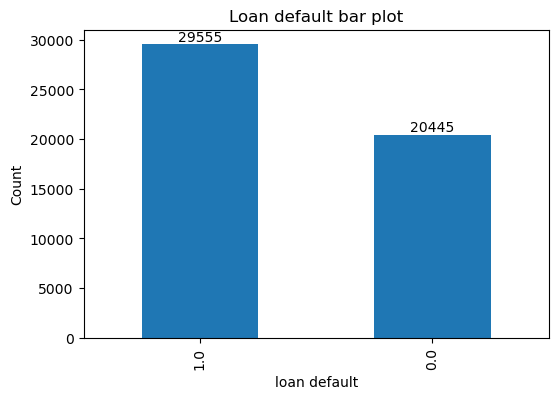

In [ ]:
ld_value_counts = data["loan_default"].value_counts()

# Creating a bar plot of the value counts of the loan default feature
plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
bar_plot = ld_value_counts.plot(kind="bar")

# Add value counts as annotations on top of the bars
for i, v in enumerate(ld_value_counts):
    bar_plot.text(i, v, str(v), ha="center", va="bottom")

plt.xlabel("loan default")
plt.ylabel("Count")
plt.title("Loan default bar plot")
plt.show()

<Figure size 600x200 with 0 Axes>

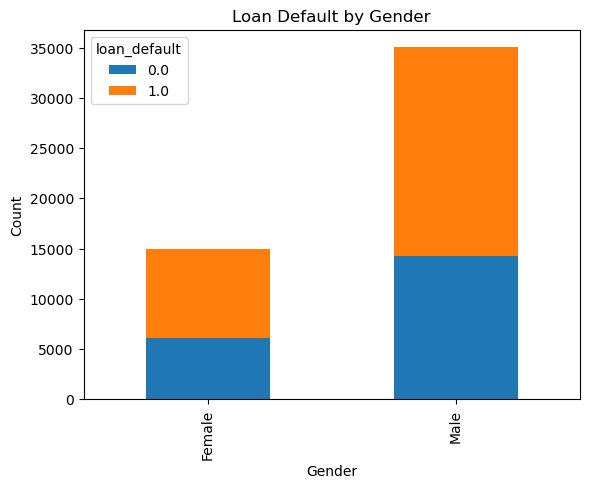

In [ ]:
# Grouping the data by 'gender' and 'loan_default' and calculating the counts for bar graph
grouped_data = data.groupby(["gender", "loan_default"]).size().unstack()

# Plot the bar graph
plt.figure(figsize=(6, 2))  # Optional: Adjust the figure size
grouped_data.plot(kind="bar", stacked=True)

# Set the labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Loan Default by Gender")

# Show the plot
plt.show()

<Figure size 400x300 with 0 Axes>

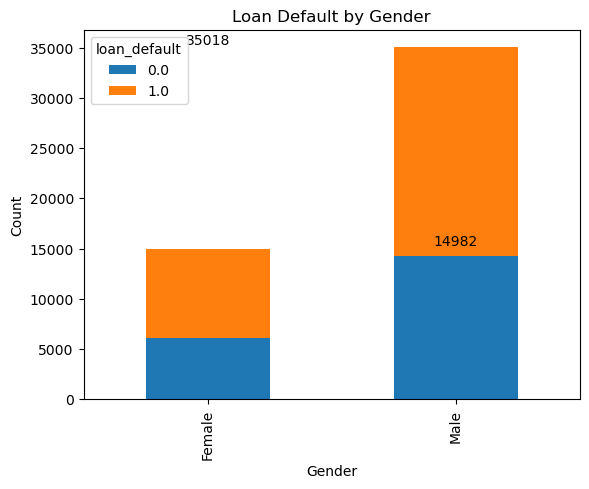

In [ ]:
# Calculating the value counts of 'gender' for bar graph
gender_counts = data["gender"].value_counts()

# Group the data by 'gender' and 'loan_default' and calculate the counts
grouped_data = data.groupby(["gender", "loan_default"]).size().unstack()

# Plot the bar graph
plt.figure(figsize=(4, 3))  # Optional: Adjust the figure size
bar_plot = grouped_data.plot(kind="bar", stacked=True)

# Add value counts as annotations on top of each bar
for i, v in enumerate(gender_counts):
    bar_plot.text(i, v, str(v), ha="center", va="bottom")

# Set the labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Loan Default by Gender")

# Show the plot
plt.show()

In [ ]:
data_dropnull = data.dropna(subset=["gender", "loan_default"])

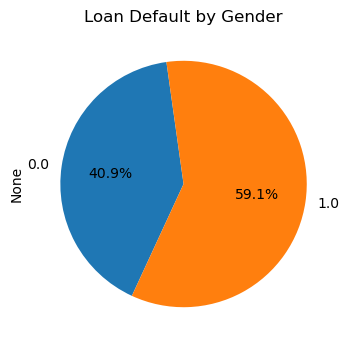

In [ ]:
# Calculate the counts for each combination of 'gender' and 'loan_default'
grouped_data_pie = data.groupby(["gender", "loan_default"]).size().unstack()

# Plot the pie chart
plt.figure(figsize=(4, 4))  # Optional: Adjust the figure size
grouped_data_pie.sum().plot(kind="pie", autopct="%1.1f%%", startangle=98)

# Set the title
plt.title("Loan Default by Gender")

# Show the plot
plt.show()


# This code will create a pie chart that represents the proportion of loan defaults for each gender. Each slice of the pie will correspond to a specific gender, and the percentage of loan defaults will be displayed on each slice.

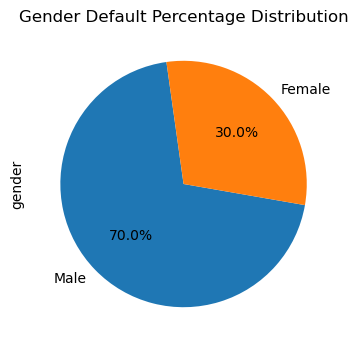

In [ ]:
# Calculate the counts for each gender
gender_counts = data["gender"].value_counts()

# Sort the counts in descending order
sorted_gender_counts = gender_counts.sort_values(ascending=False)

# Plot the pie chart
plt.figure(figsize=(4, 4))  # Optional: Adjust the figure size
sorted_gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=98)

# Set the title
plt.title("Gender Default Percentage Distribution")

# Show the plot
plt.show()

<Figure size 1400x1000 with 0 Axes>

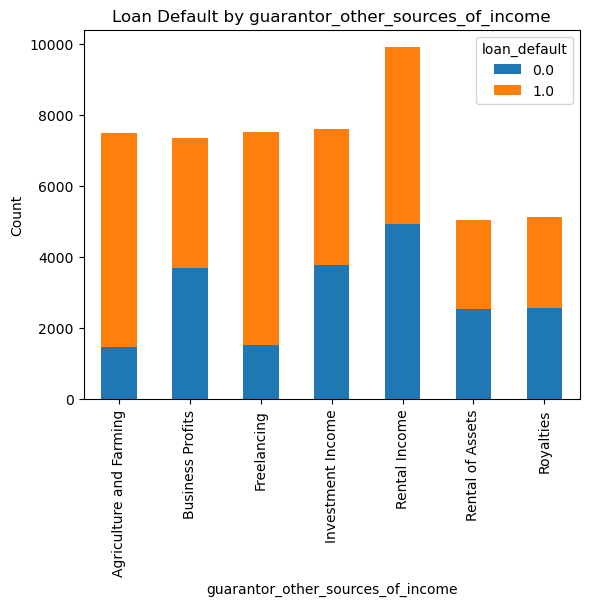

In [ ]:
# Grouping the data by 'guarantor_other_sources_of_income' and 'loan_default' and calculating the counts for bar graph
grouped_data = (
    data.groupby(["guarantor_other_sources_of_income", "loan_default"]).size().unstack()
)

# Plot the bar graph
plt.figure(figsize=(14, 10))  # Optional: Adjust the figure size
grouped_data.plot(kind="bar", stacked=True)

# Set the labels and title
plt.xlabel("guarantor_other_sources_of_income")
plt.ylabel("Count")
plt.title("Loan Default by guarantor_other_sources_of_income")

# Show the plot
plt.show()

<Figure size 1400x1000 with 0 Axes>

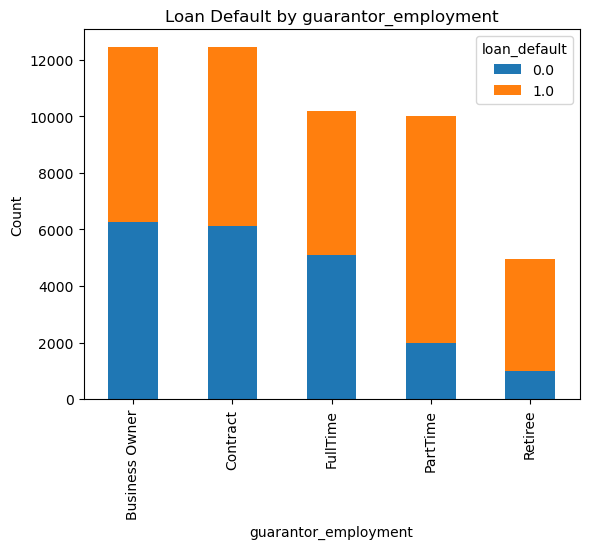

In [ ]:
# Grouping the data by 'guarantor_employment' and 'loan_default' and calculating the counts for bar graph
grouped_data = data.groupby(["guarantor_employment", "loan_default"]).size().unstack()

# Plot the bar graph
plt.figure(figsize=(14, 10))  # Optional: Adjust the figure size
grouped_data.plot(kind="bar", stacked=True)

# Set the labels and title
plt.xlabel("guarantor_employment")
plt.ylabel("Count")
plt.title("Loan Default by guarantor_employment")

# Show the plot
plt.show()

<Figure size 1400x1000 with 0 Axes>

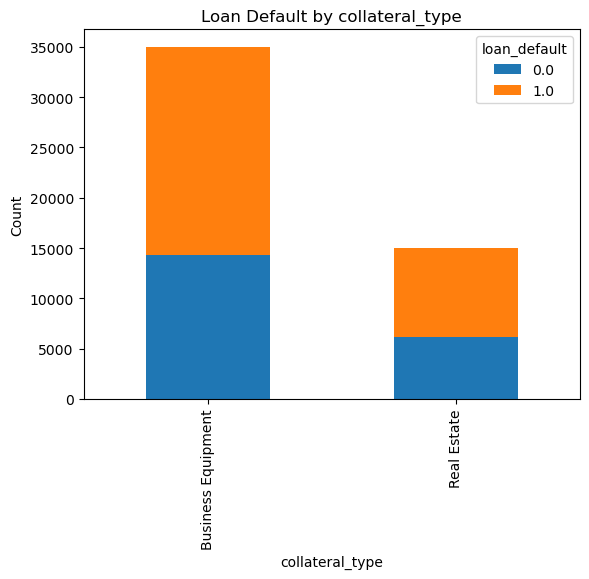

In [ ]:
# Grouping the data by 'collateral_type' and 'loan_default' and calculating the counts for bar graph
grouped_data = data.groupby(["collateral_type", "loan_default"]).size().unstack()

# Plot the bar graph
plt.figure(figsize=(14, 10))  # Optional: Adjust the figure size
grouped_data.plot(kind="bar", stacked=True)

# Set the labels and title
plt.xlabel("collateral_type")
plt.ylabel("Count")
plt.title("Loan Default by collateral_type")

# Show the plot
plt.show()

<Figure size 800x400 with 0 Axes>

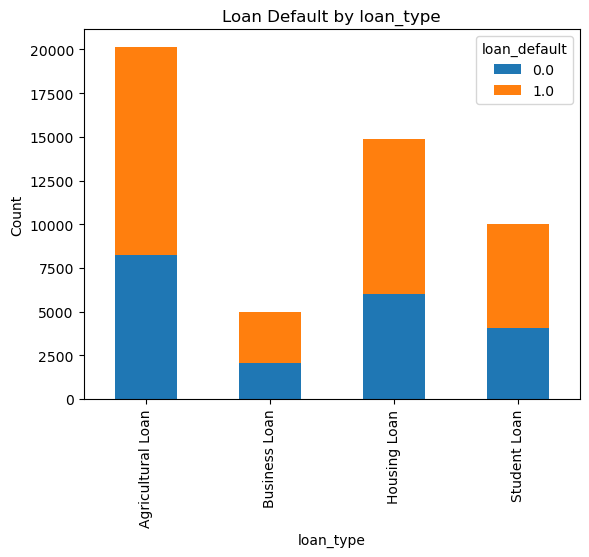

In [ ]:
# Grouping the data by 'loan_type' and 'loan_default' and calculating the counts for bar graph
grouped_data = data.groupby(["loan_type", "loan_default"]).size().unstack()

# Plot the bar graph
plt.figure(figsize=(8, 4))  # Optional: Adjust the figure size
grouped_data.plot(kind="bar", stacked=True)

# Set the labels and title
plt.xlabel("loan_type")
plt.ylabel("Count")
plt.title("Loan Default by loan_type")

# Show the plot
plt.show()

<Figure size 1400x1000 with 0 Axes>

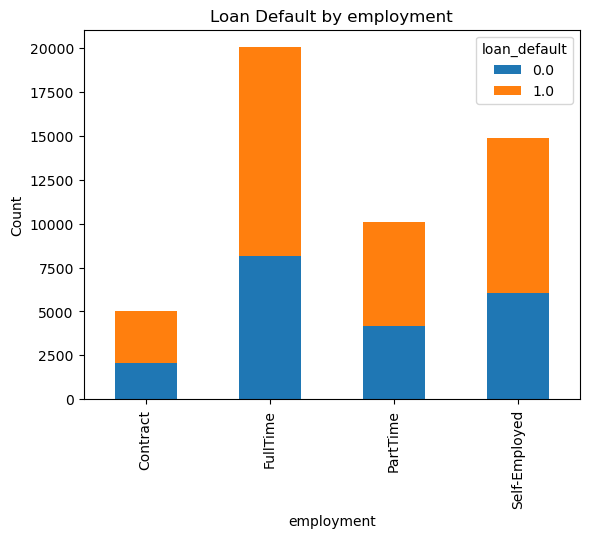

In [ ]:
# Grouping the data by 'employment' and 'loan_default' and calculating the counts for bar graph
grouped_data = data.groupby(["employment", "loan_default"]).size().unstack()

# Plot the bar graph
plt.figure(figsize=(14, 10))  # Optional: Adjust the figure size
grouped_data.plot(kind="bar", stacked=True)

# Set the labels and title
plt.xlabel("employment")
plt.ylabel("Count")
plt.title("Loan Default by employment")

# Show the plot
plt.show()

<Figure size 800x400 with 0 Axes>

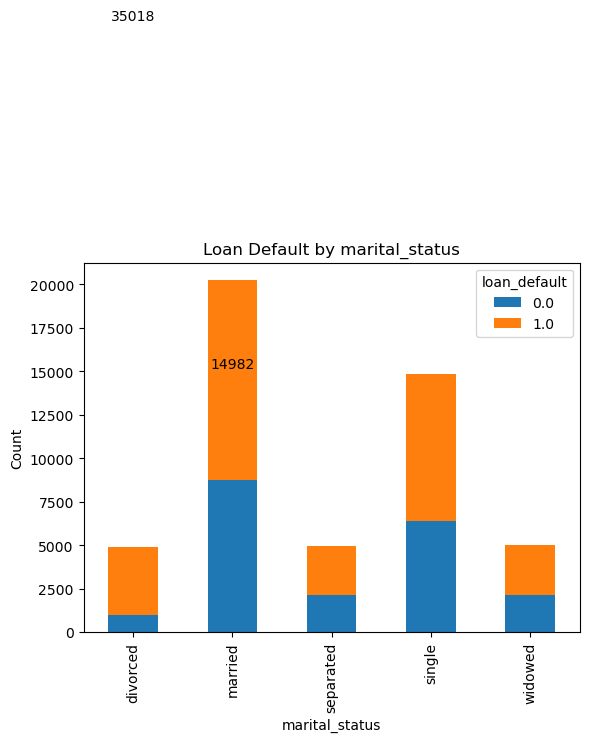

In [ ]:
# Calculate the value counts of 'marital_status' for bar plot
marital_status_counts = data["marital_status"].value_counts()

# Group the data by 'gender' and 'loan_default' and calculate the counts
grouped_data = data.groupby(["marital_status", "loan_default"]).size().unstack()

# Plot the bar graph
plt.figure(figsize=(8, 4))  # Optional: Adjust the figure size
bar_plot = grouped_data.plot(kind="bar", stacked=True)

# Add value counts as annotations on top of each bar
for i, v in enumerate(gender_counts):
    bar_plot.text(i, v, str(v), ha="center", va="bottom")

# Set the labels and title
plt.xlabel("marital_status")
plt.ylabel("Count")
plt.title("Loan Default by marital_status")

# Show the plot
plt.show()

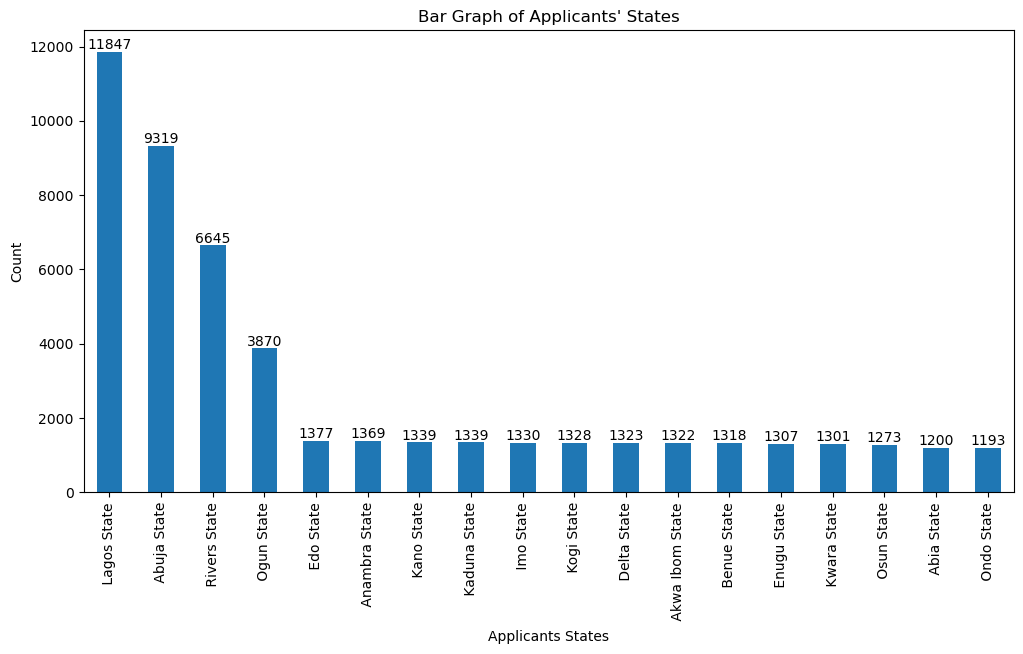

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar graph
bar_plot = applicant_state_count.plot.bar()

# Set labels and title
plt.xlabel("Applicants States")
plt.ylabel("Count")
plt.title("Bar Graph of Applicants' States")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Add counts on top of the bars
for i, count in enumerate(applicant_state_count.values):
    plt.annotate(str(count), xy=(i, count), ha="center", va="bottom")

# Display the plot
plt.show()

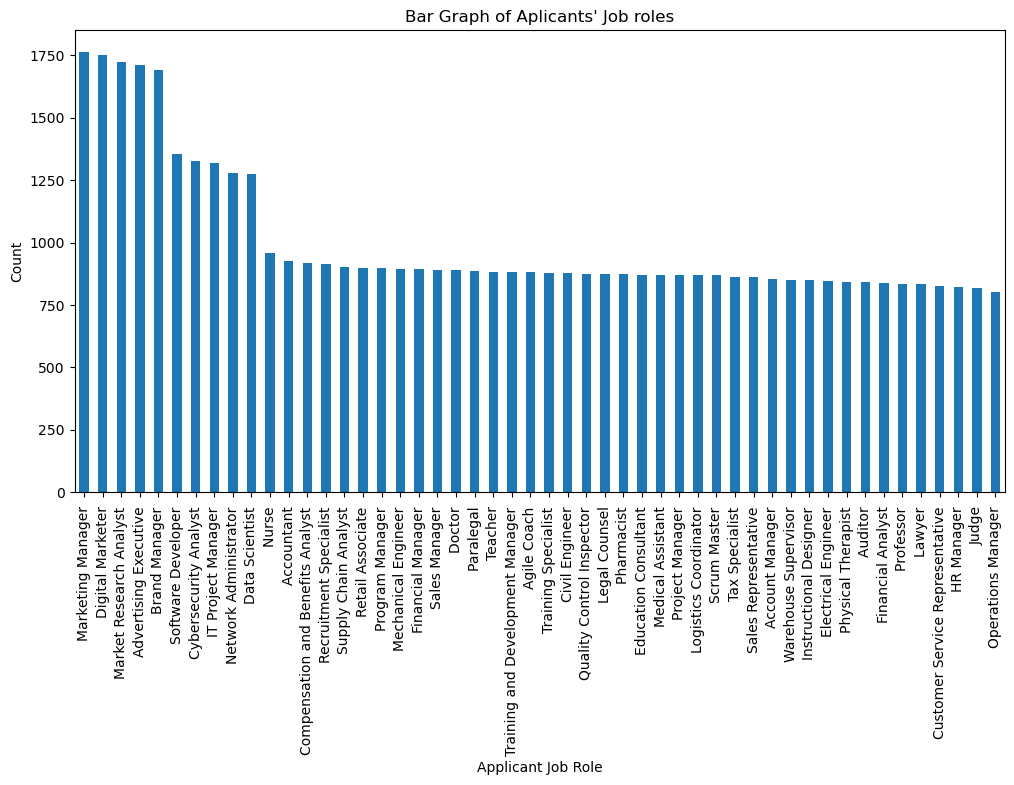

In [ ]:
# Ploting the bar graph of the applicants' job role

# Set the figure size
plt.figure(figsize=(12, 6))
applicant_job_role_count.plot.bar()

# Set labels and title
plt.xlabel("Applicant Job Role")
plt.ylabel("Count")
plt.title("Bar Graph of Aplicants' Job roles")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

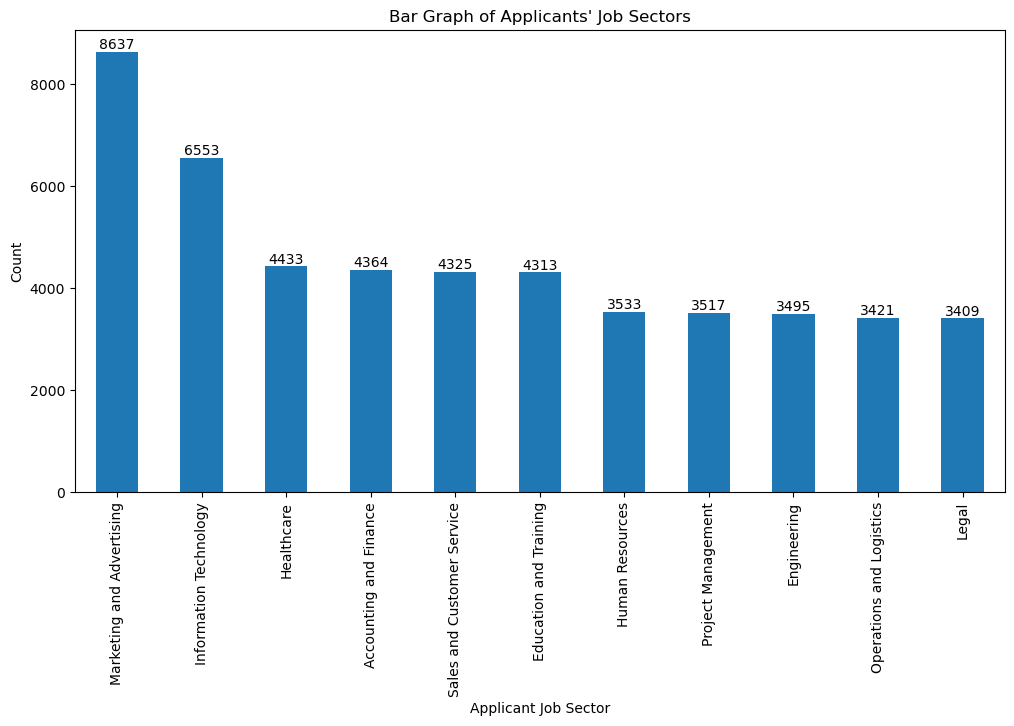

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar graph
bar_plot = applicant_job_sector_count.plot.bar()

# Set labels and title
plt.xlabel("Applicant Job Sector")
plt.ylabel("Count")
plt.title("Bar Graph of Applicants' Job Sectors")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Add counts on top of the bars
for i, count in enumerate(applicant_job_sector_count.values):
    plt.annotate(str(count), xy=(i, count), ha="center", va="bottom")

# Display the plot
plt.show()

In [ ]:
data.head()

,customer_id,name,gender,marital_status,phone_number,email_address,date_of_birth,address,national_identity_number,employment,income_per_month,loan_type,applicants_job_role_sector,repayment_type,collateral_type,collateral_value,guarantor_name,guarantor_phone_number,guarantor_email,guarantor_dob,guarantor_address,guarantor_social_security_number,guarantor_relationship,guarantor_employment,guarantor_other_sources_of_income,guarantor_income_per_month,loan_amount,loan_default,applicant_job_role,applicant_job_sector,age,guarantor_age,applicant_street,applicant_zone,applicant_lga,applicant_state,guarantor_street,guarantor_zone,guarantor_lga,guarantor_state
0,LA586298,Iyke Johnson,Male,divorced,7083073753,torresjames@example.net,1984-08-06,"5677 Ahmadu Bello Way Str., Abuja Central, Abuja Central LGA, Abuja State",48795524366,FullTime,251236,Business Loan,Lawyer (Legal),Principal & Interest,Business Equipment,1514544,Onyeka Esangbedo,9061227796,carriemurray@example.com,1965-09-07,"2564 Adetokunbo Ademola Crescent Str., Abuja Central, Abuja Central LGA, Abuja State",108111083,Parent,Contract,Freelancing,578807,957624,1.0,Lawyer,Legal,38.0,57.0,5677 Ahmadu Bello Way Str.,Abuja Central,Abuja Central LGA,Abuja State,2564 Adetokunbo Ademola Crescent Str.,Abuja Central,Abuja Central LGA,Abuja State
1,LA429449,Umaru Osinaike,Male,married,9072117737,davidjohnson@example.net,1966-04-06,"281 Capitol Road Str., Agege, Agege LGA, Lagos State",59336208791,FullTime,286225,Agricultural Loan,Cybersecurity Analyst (Information Technology),Principal & Interest,Business Equipment,9559666,Micheal Akinwunmi,8158921777,xpetersen@example.com,1989-05-16,"6326 Ojowo Road Str., Ijebu-Ode, Ijebu-Ode LGA, Ogun State",572805627,Parent,PartTime,Rental Income,264036,555027,1.0,Cybersecurity Analyst,Information Technology,57.0,34.0,281 Capitol Road Str.,Agege,Agege LGA,Lagos State,6326 Ojowo Road Str.,Ijebu-Ode,Ijebu-Ode LGA,Ogun State
2,LA647045,Edet Ume,Male,married,8150204429,stevensonsarah@example.net,1999-11-21,"6884 Udo Udoma Avenue Str., Uyo, Uyo LGA, Akwa Ibom State",30562895958,Contract,113014,Agricultural Loan,Software Developer (Information Technology),Principal & Interest,Business Equipment,8091217,Ini Adekunle,8068598646,hollywalters@example.com,1972-03-22,"9745 Toyin Street Str., Ikeja, Epe LGA, Lagos State",841042065,Employer,PartTime,Agriculture and Farming,559450,922105,0.0,Software Developer,Information Technology,23.0,51.0,6884 Udo Udoma Avenue Str.,Uyo,Uyo LGA,Akwa Ibom State,9745 Toyin Street Str.,Ikeja,Epe LGA,Lagos State
3,LA974658,Adeola Okoye,Male,single,9117712031,banderson@example.com,1969-06-29,"1694 Adetokunbo Ademola Crescent Str., Abuja Central, Abuja Central LGA, Abuja State",69775691328,FullTime,225897,Agricultural Loan,HR Manager (Human Resources),Principal & Interest,Real Estate,4793956,Fadekemi Balogun,8142159772,david12@example.net,1987-12-11,"7651 Adeniran Ogunsanya Street Str., Surulere, Agege LGA, Lagos State",63884957,Brother,Business Owner,Business Profits,565663,620694,1.0,HR Manager,Human Resources,54.0,35.0,1694 Adetokunbo Ademola Crescent Str.,Abuja Central,Abuja Central LGA,Abuja State,7651 Adeniran Ogunsanya Street Str.,Surulere,Agege LGA,Lagos State
4,LA090782,Zainab Alabi,Male,married,7034959376,jburgess@example.net,2003-12-26,"3209 Adeniran Ogunsanya Street Str., Surulere, Epe LGA, Lagos State",51068441259,Self-Employed,157054,Housing Loan,Cybersecurity Analyst (Information Technology),Principal & Interest,Real Estate,4578146,Amadike Ogundele,9001725579,jeffery57@example.org,1978-06-07,"4389 Mcc Road Str., Owerri, Owerri LGA, Imo State",141353524,Brother,Retiree,Rental Income,716959,216655,0.0,Cybersecurity Analyst,Information Technology,19.0,45.0,3209 Adeniran Ogunsanya Street Str.,Surulere,Epe LGA,Lagos State,4389 Mcc Road Str.,Owerri,Owerri LGA,Imo State


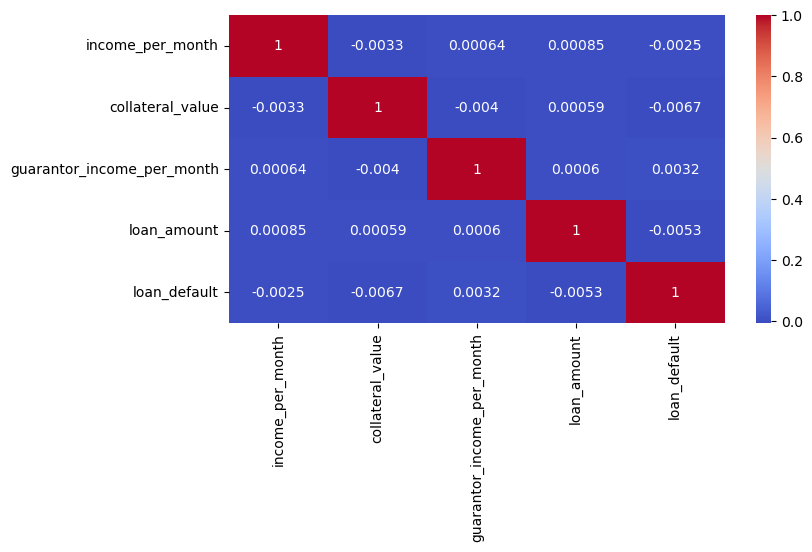

In [ ]:
# Selecting the specific columns for correlation analysis using heatmap

# Set the figure size
plt.figure(figsize=(8, 4))


selected_columns = [
    "income_per_month",
    "collateral_value",
    "guarantor_income_per_month",
    "loan_amount",
    "loan_default",
]

# Subset the DataFrame based on selected columns
subset_data = data[selected_columns]

# Calculate the correlation matrix
corr_matrix = subset_data.corr()


# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Display the plot
plt.show()

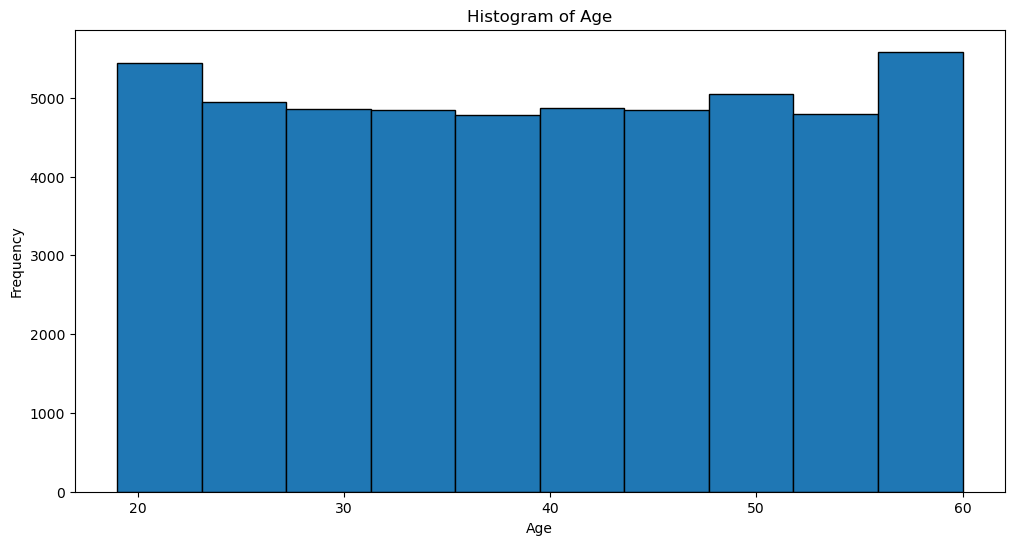

In [ ]:
# The histogram of the "age" feature

# Set the figure size
plt.figure(figsize=(12, 6))

plt.hist(data["age"], bins=10, edgecolor="black")

# Customize the plot
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")

# Display the plot
plt.show()

 ## Insights from the exploratory data analysis


 1. 70% of the male gender are likely  not to default on their loans.
 2. Majority of the loan applicants are business owners and contract workers
 3. Majority of the loans were applied for agricultural purposes
 4. There is little or neglegible relationship/correlation betwwen the variables as can be seen fro the heatmap
 5. Majority of the loan applicants are in their twenties & sixties as can be seen from the histogram of the "age" feature
 6. Also majority of the applicants' job sector is "Education and Training"



## Important things to note

1. Loan default value of 1 represent Yes
2. Loan default value of 0 represent No

In [ ]:
# Checking the first five rows of the data
data.head()

,customer_id,name,gender,marital_status,phone_number,email_address,date_of_birth,address,national_identity_number,employment,income_per_month,loan_type,applicants_job_role_sector,repayment_type,collateral_type,collateral_value,guarantor_name,guarantor_phone_number,guarantor_email,guarantor_dob,guarantor_address,guarantor_social_security_number,guarantor_relationship,guarantor_employment,guarantor_other_sources_of_income,guarantor_income_per_month,loan_amount,loan_default,applicant_job_role,applicant_job_sector,age,guarantor_age,applicant_street,applicant_zone,applicant_lga,applicant_state,guarantor_street,guarantor_zone,guarantor_lga,guarantor_state
0,LA586298,Iyke Johnson,Male,divorced,7083073753,torresjames@example.net,1984-08-06,"5677 Ahmadu Bello Way Str., Abuja Central, Abuja Central LGA, Abuja State",48795524366,FullTime,251236,Business Loan,Lawyer (Legal),Principal & Interest,Business Equipment,1514544,Onyeka Esangbedo,9061227796,carriemurray@example.com,1965-09-07,"2564 Adetokunbo Ademola Crescent Str., Abuja Central, Abuja Central LGA, Abuja State",108111083,Parent,Contract,Freelancing,578807,957624,1.0,Lawyer,Legal,38.0,57.0,5677 Ahmadu Bello Way Str.,Abuja Central,Abuja Central LGA,Abuja State,2564 Adetokunbo Ademola Crescent Str.,Abuja Central,Abuja Central LGA,Abuja State
1,LA429449,Umaru Osinaike,Male,married,9072117737,davidjohnson@example.net,1966-04-06,"281 Capitol Road Str., Agege, Agege LGA, Lagos State",59336208791,FullTime,286225,Agricultural Loan,Cybersecurity Analyst (Information Technology),Principal & Interest,Business Equipment,9559666,Micheal Akinwunmi,8158921777,xpetersen@example.com,1989-05-16,"6326 Ojowo Road Str., Ijebu-Ode, Ijebu-Ode LGA, Ogun State",572805627,Parent,PartTime,Rental Income,264036,555027,1.0,Cybersecurity Analyst,Information Technology,57.0,34.0,281 Capitol Road Str.,Agege,Agege LGA,Lagos State,6326 Ojowo Road Str.,Ijebu-Ode,Ijebu-Ode LGA,Ogun State
2,LA647045,Edet Ume,Male,married,8150204429,stevensonsarah@example.net,1999-11-21,"6884 Udo Udoma Avenue Str., Uyo, Uyo LGA, Akwa Ibom State",30562895958,Contract,113014,Agricultural Loan,Software Developer (Information Technology),Principal & Interest,Business Equipment,8091217,Ini Adekunle,8068598646,hollywalters@example.com,1972-03-22,"9745 Toyin Street Str., Ikeja, Epe LGA, Lagos State",841042065,Employer,PartTime,Agriculture and Farming,559450,922105,0.0,Software Developer,Information Technology,23.0,51.0,6884 Udo Udoma Avenue Str.,Uyo,Uyo LGA,Akwa Ibom State,9745 Toyin Street Str.,Ikeja,Epe LGA,Lagos State
3,LA974658,Adeola Okoye,Male,single,9117712031,banderson@example.com,1969-06-29,"1694 Adetokunbo Ademola Crescent Str., Abuja Central, Abuja Central LGA, Abuja State",69775691328,FullTime,225897,Agricultural Loan,HR Manager (Human Resources),Principal & Interest,Real Estate,4793956,Fadekemi Balogun,8142159772,david12@example.net,1987-12-11,"7651 Adeniran Ogunsanya Street Str., Surulere, Agege LGA, Lagos State",63884957,Brother,Business Owner,Business Profits,565663,620694,1.0,HR Manager,Human Resources,54.0,35.0,1694 Adetokunbo Ademola Crescent Str.,Abuja Central,Abuja Central LGA,Abuja State,7651 Adeniran Ogunsanya Street Str.,Surulere,Agege LGA,Lagos State
4,LA090782,Zainab Alabi,Male,married,7034959376,jburgess@example.net,2003-12-26,"3209 Adeniran Ogunsanya Street Str., Surulere, Epe LGA, Lagos State",51068441259,Self-Employed,157054,Housing Loan,Cybersecurity Analyst (Information Technology),Principal & Interest,Real Estate,4578146,Amadike Ogundele,9001725579,jeffery57@example.org,1978-06-07,"4389 Mcc Road Str., Owerri, Owerri LGA, Imo State",141353524,Brother,Retiree,Rental Income,716959,216655,0.0,Cybersecurity Analyst,Information Technology,19.0,45.0,3209 Adeniran Ogunsanya Street Str.,Surulere,Epe LGA,Lagos State,4389 Mcc Road Str.,Owerri,Owerri LGA,Imo State


## Feature Enginnering and Model building

In [ ]:
# Checking the shape of the data before selecting the features for training the machine model
data.shape

(50000, 40)

In [ ]:
# Checking the data columns
data.columns

Index(['customer_id', 'name', 'gender', 'marital_status', 'phone_number',
       'email_address', 'date_of_birth', 'address', 'national_identity_number',
       'employment', 'income_per_month', 'loan_type',
       'applicants_job_role_sector', 'repayment_type', 'collateral_type',
       'collateral_value', 'guarantor_name', 'guarantor_phone_number',
       'guarantor_email', 'guarantor_dob', 'guarantor_address',
       'guarantor_social_security_number', 'guarantor_relationship',
       'guarantor_employment', 'guarantor_other_sources_of_income',
       'guarantor_income_per_month', 'loan_amount', 'loan_default',
       'applicant_job_role', 'applicant_job_sector', 'age', 'guarantor_age',
       'applicant_street', 'applicant_zone', 'applicant_lga',
       'applicant_state', 'guarantor_street', 'guarantor_zone',
       'guarantor_lga', 'guarantor_state'],
      dtype='object')

In [ ]:
# Selecting the relevant features and target variable
features = [
    "gender",
    "marital_status",
    "date_of_birth",
    "employment",
    "income_per_month",
    "loan_type",
    "applicants_job_role_sector",
    "repayment_type",
    "collateral_type",
    "collateral_value",
    "guarantor_dob",
    "guarantor_relationship",
    "guarantor_employment",
    "guarantor_other_sources_of_income",
    "guarantor_income_per_month",
    "loan_amount",
    "applicant_job_role",
    "applicant_job_sector",
    "age",
    "guarantor_age",
    "applicant_street",
    "applicant_zone",
    "applicant_lga",
    "applicant_state",
    "guarantor_street",
    "guarantor_zone",
    "guarantor_lga",
    "guarantor_state",
]

target = "loan_default"

# Preprocess the data
data = data[features + [target]]
data = data.dropna()  # Remove rows with missing values
data = data.apply(LabelEncoder().fit_transform)  # Encode categorical variables

# Split the data into training and testing sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
import joblib

# Train the Gradient Boosting classifier

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC Score: {roc_auc}")

Accuracy: 0.7976
Precision: 0.7982007135101598
Recall: 0.8768103595161015
F1 Score: 0.8356609288730107
AUC-ROC Score: 0.780937254316269


In [ ]:
X_test.head(2)

,gender,marital_status,date_of_birth,employment,income_per_month,loan_type,applicants_job_role_sector,repayment_type,collateral_type,collateral_value,guarantor_dob,guarantor_relationship,guarantor_employment,guarantor_other_sources_of_income,guarantor_income_per_month,loan_amount,applicant_job_role,applicant_job_sector,age,guarantor_age,applicant_street,applicant_zone,applicant_lga,applicant_state,guarantor_street,guarantor_zone,guarantor_lga,guarantor_state
33553,1,3,8774,2,39155,2,25,0,0,7969,5089,1,3,5,17950,37267,25,7,16,27,10619,25,25,16,22654,26,26,8
9427,1,0,198,1,35404,2,30,0,0,33745,5219,3,3,3,11223,17084,30,8,40,26,11802,1,1,1,26620,32,32,2


In [ ]:
# Using the trained model to make predictions on new data
new_data = pd.DataFrame(
    [
        [
            1,
            3,
            8774,
            2,
            39155,
            2,
            25,
            0,
            0,
            7969,
            5089,
            1,
            3,
            5,
            17950,
            37267,
            25,
            7,
            16,
            27,
            10619,
            25,
            25,
            16,
            22654,
            26,
            26,
            8,
        ]
    ],
    columns=features,
)
new_data_encoded = new_data.apply(LabelEncoder().fit_transform)
prediction = gb_classifier.predict(new_data_encoded)
print(f"Prediction: {prediction}")

if prediction[0] == 0:
    print("applicant will not default")
else:
    print("applicant will default")

Prediction: [0]
applicant will not default


In [ ]:
# Save the trained classifier using joblib
joblib.dump(
    gb_classifier,
    "C:/Users/user/Desktop/Stutern_inter_track_project/loan_prediction_model.pkl",
)

['C:/Users/user/Desktop/Stutern_inter_track_project/loan_prediction_model.pkl']

In [ ]:
# Saving the loan model using pickle
import pickle

filename = "C:/Users/user/Desktop/Stutern_inter_track_project/loan_prediction_model.sav"
pickle.dump(gb_classifier, open(filename, "wb"))

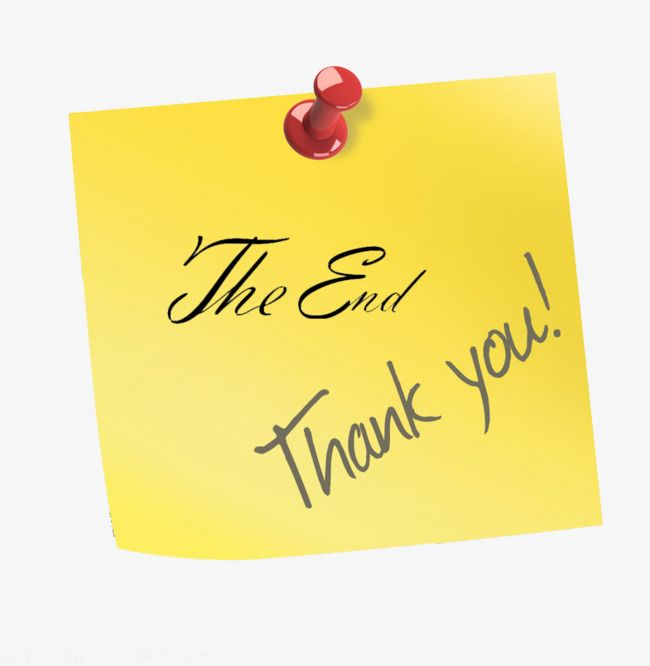